In [1]:
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# Initialize VADER's SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
A_path = './Data/A.txt'
K_path = './Data/K.txt'

In [4]:
def prepare_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    lines = [line.strip('\n') for line in lines]
    lines = [line for line in lines if len(line) > 10]

    return lines

In [6]:
def get_sentiment(lines, component):
    sentiment = []
    sent = 0
    for line in lines:
        for token in line.split():
            c = analyzer.polarity_scores(token)[component]
            sent += c
            sentiment.append(sent)
    return sentiment

In [8]:
def sent_plot(file_path, component):
    plt.figure(figsize=(12, 5))
    a = prepare_data(file_path)
    a_data = get_sentiment(a, component)
    plt.plot(range(len(a_data)), a_data)
    plt.xlim(0)
    plt.title(component)
    plt.show()

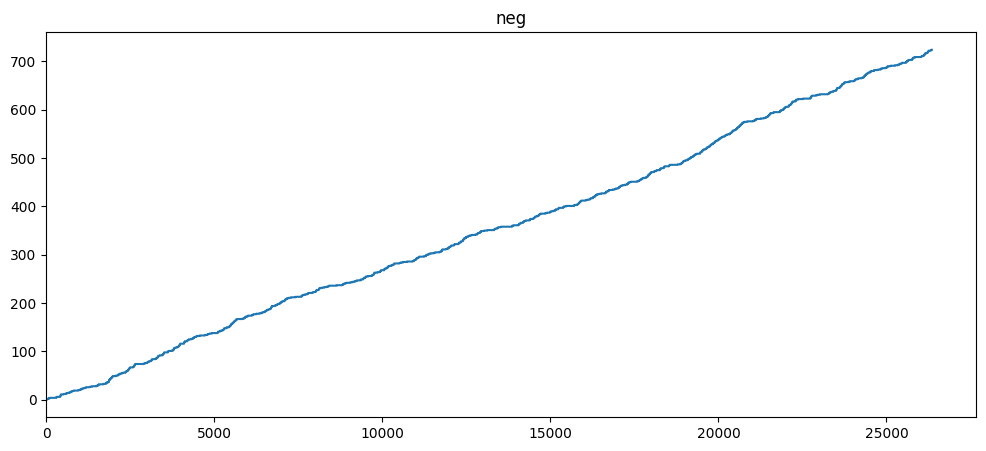

In [9]:
sent_plot(A_path, 'neg')

In [10]:
def double_sent_plot(file_path):
    plt.figure(figsize=(12, 5))
    a = prepare_data(file_path)
    p_data = get_sentiment(a, 'pos')
    n_data = get_sentiment(a, 'neg')
    plt.plot(range(len(p_data)), p_data, label='pos', color='g')
    plt.plot(range(len(n_data)), n_data, label='neg', color='r')
    plt.xlim(0)
    plt.legend()
    plt.show()

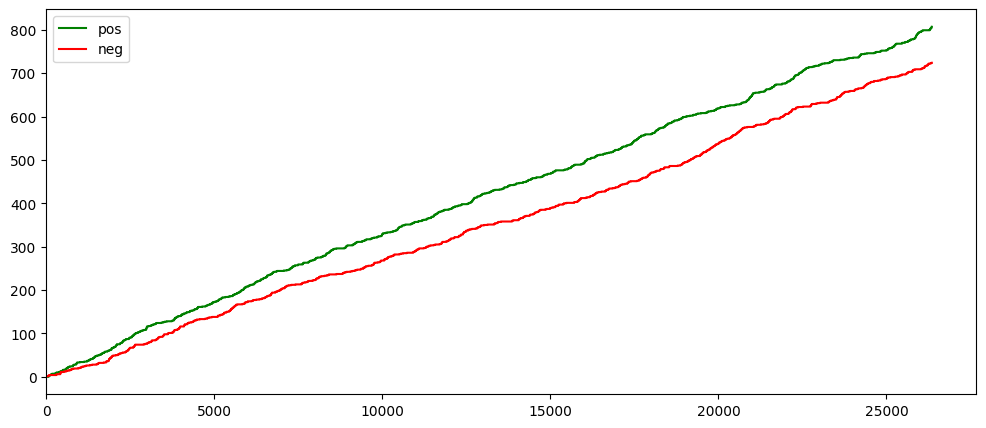

In [11]:
double_sent_plot(A_path)

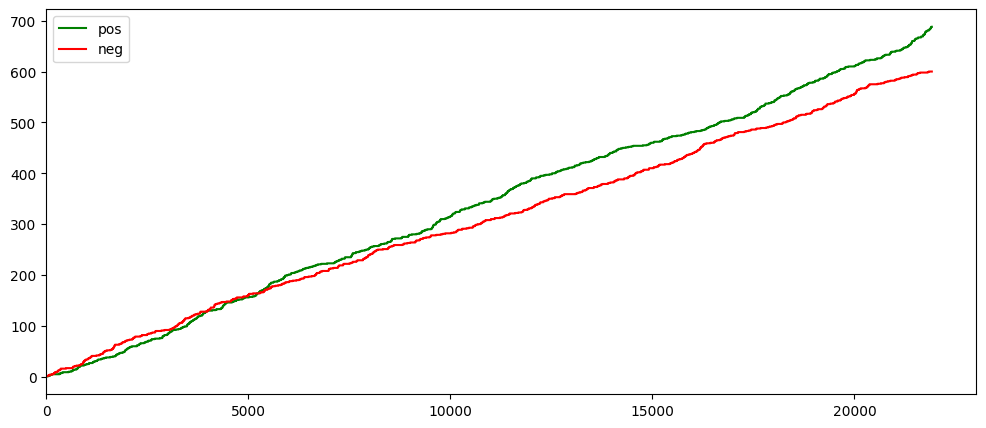

In [12]:
double_sent_plot(K_path)

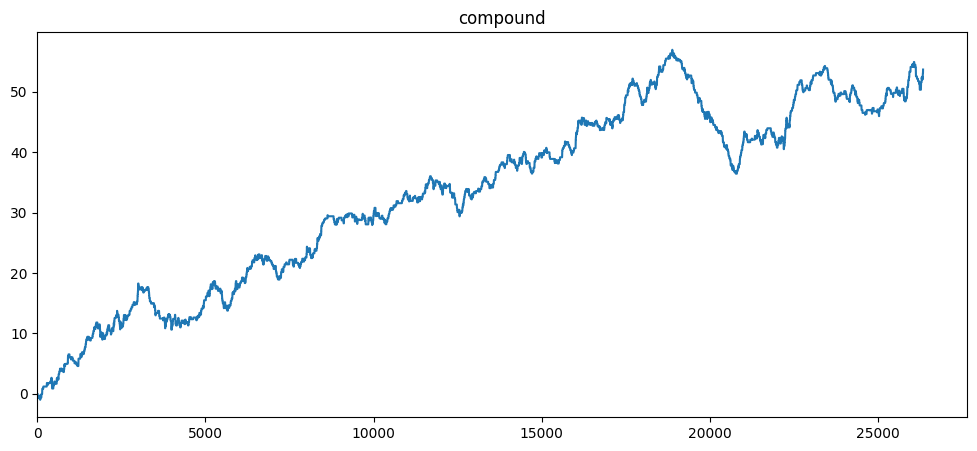

In [14]:
sent_plot(A_path, 'compound')

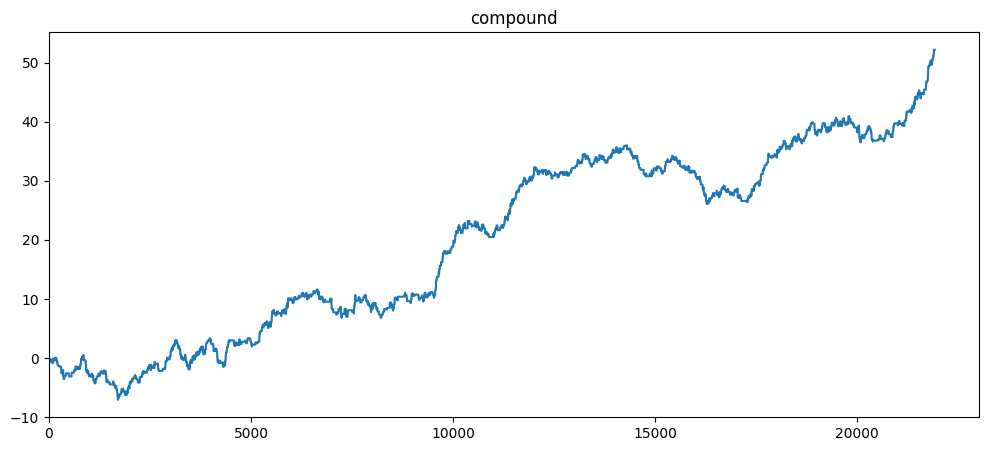

In [15]:
sent_plot(K_path, 'compound')